In [1]:
%reset

In [2]:
import sax
from simphony.libraries import siepic,sipann
import quantp 
from functools import partial
from simphony.quantum import QuantumState
import numpy as np
import matplotlib.pyplot as plt



def su3(wl=1.55,theta1=0,phi1=0,theta2=0,phi2=0,theta3=0,phi3=0) -> sax.SDict:
    cir_3,info=sax.circuit(netlist={
        "instances" :{
            "su1": "SU",
            "su2": "SU",
            "su3": "SU",
        },
        "connections":{
            "su1,outt":"su2,int",
            "su1,outb":"su3,int",
            "su3,outt":"su2,inb",
        },
        "ports":{
            "in1":"su1,int",
            "in2":"su1,inb",
            "in3":"su3,inb",
            "out1":"su2,outt",
            "out2":"su2,outb",
            "out3":"su3,outb",
        }
    },models={
        "SU":partial(quantp.trr)
    })

    val=cir_3(wl=wl,su1={"theta":theta1,"phi":phi1},
              su2={"theta":theta2,"phi":phi2},
              su3={"theta":theta3,"phi":phi3})
    return val





INFO:tensorflow:Restoring parameters from C:\Users\akhil\AppData\Roaming\Python\Python312\site-packages\SiPANN\ANN\TIGHT_ANGLE_GAP/model
INFO:tensorflow:Restoring parameters from C:\Users\akhil\AppData\Roaming\Python\Python312\site-packages\SiPANN\ANN\TIGHT_ANGLE_STRAIGHT/model
INFO:tensorflow:Restoring parameters from C:\Users\akhil\AppData\Roaming\Python\Python312\site-packages\SiPANN\ANN\TIGHT_ANGLE_BENT_RAND/model


In [23]:

a=[1,2,3]

np.multiply(-1,a)

array([-1, -2, -3])

In [3]:
from simphony.quantum import QuantumSim, CoherentState, SqueezedState,ThermalState, compose_qstate
import thewalrus as tw

wl=1.55 

False
False
False


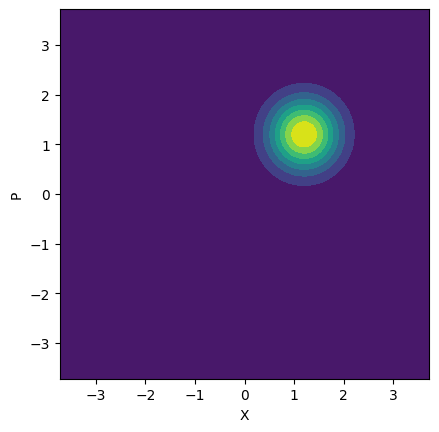

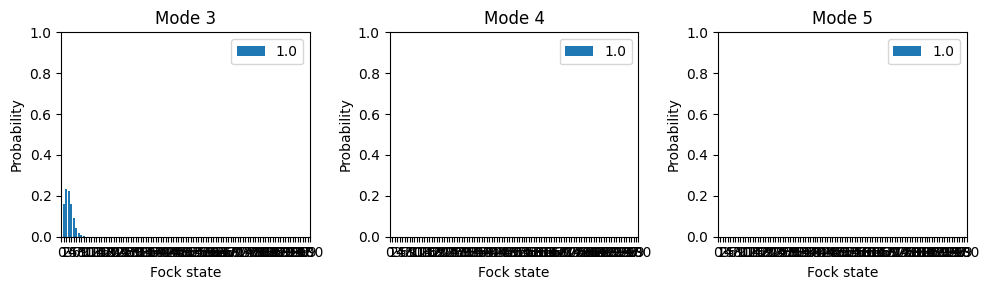

False
False
False


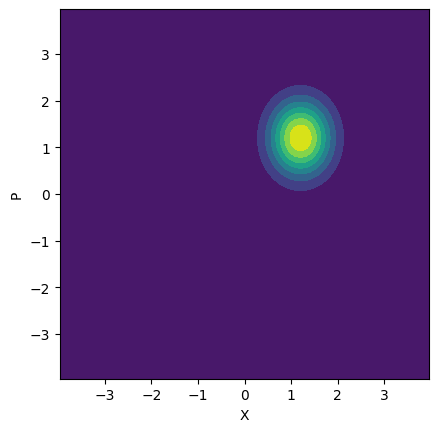

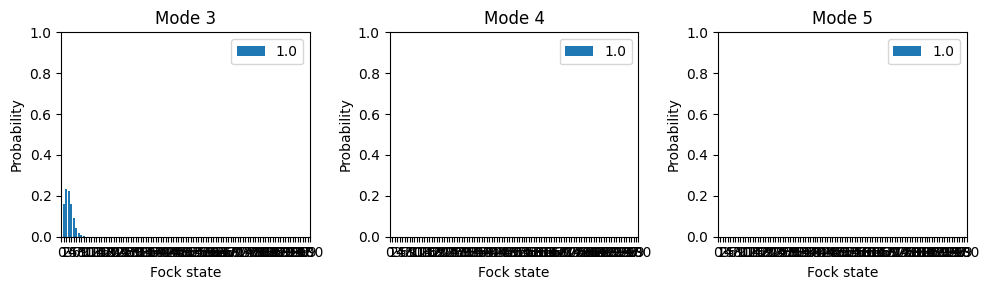

False
False
False


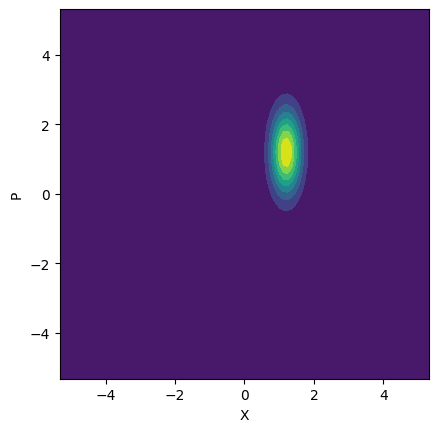

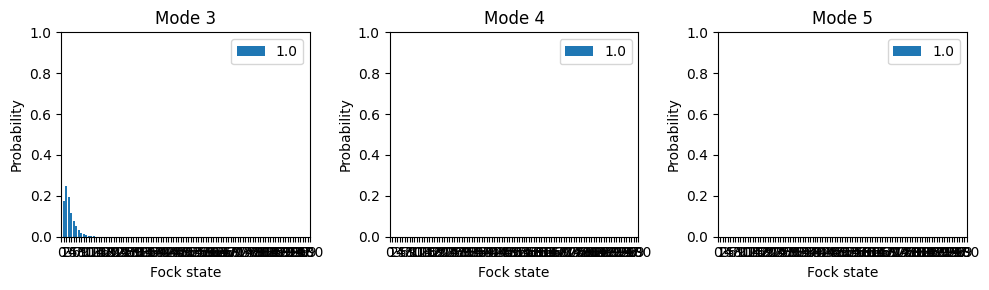

False
False
False


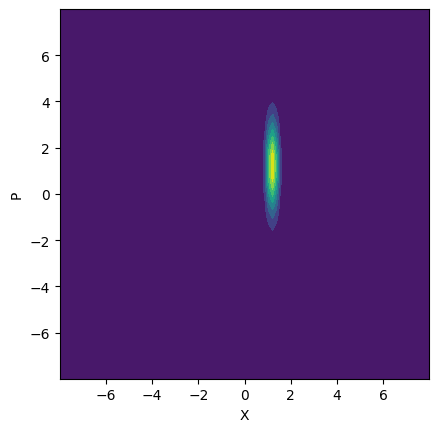

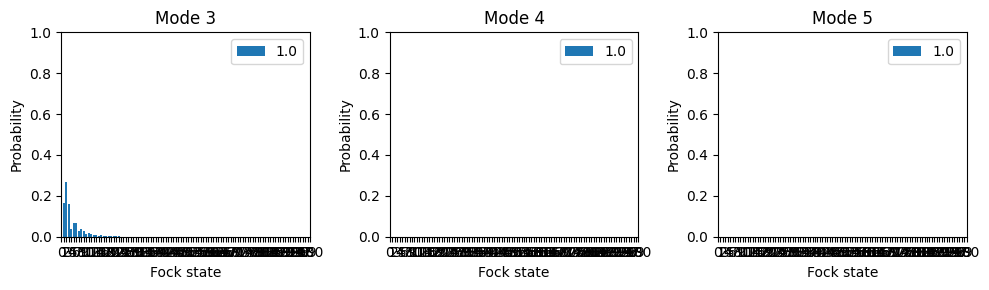

False
False
False


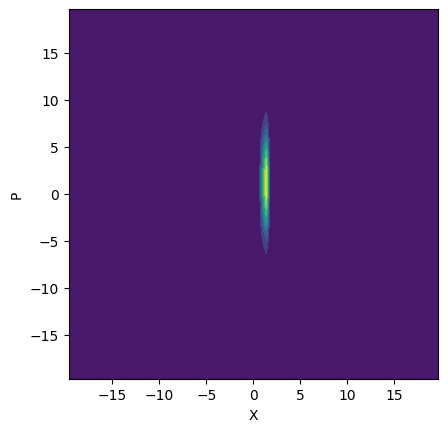

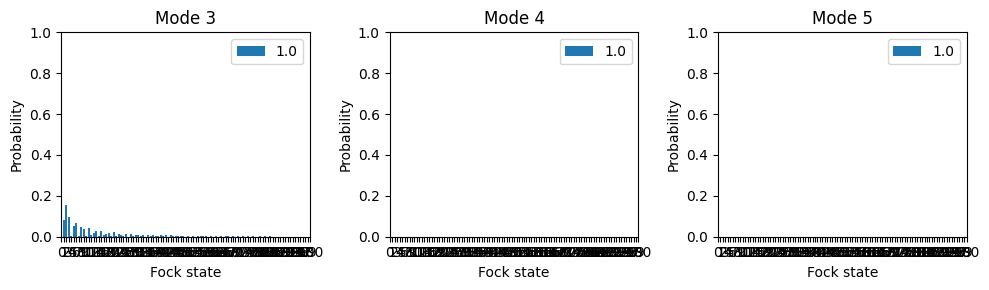

False
False
False


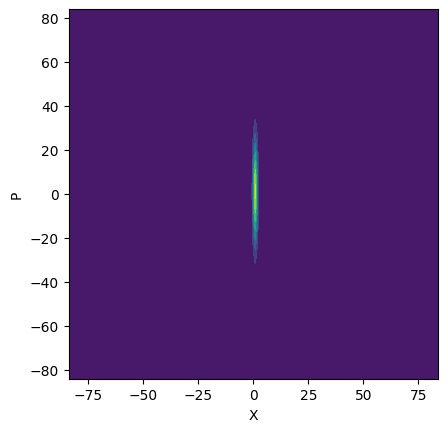

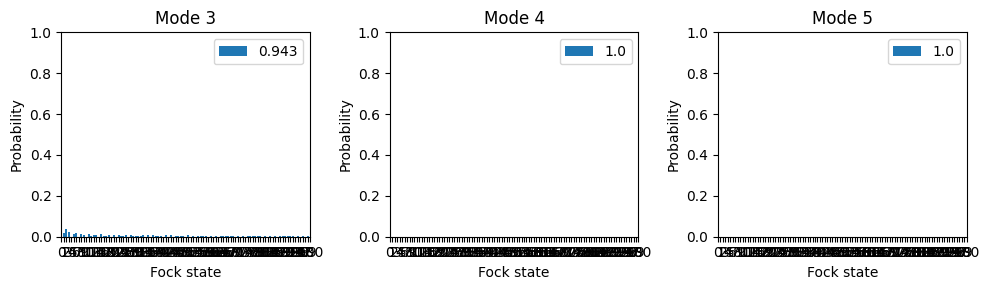

In [12]:

i1=0.5
i2=0.5
i3=0.25
j1=0.25
j2=0.25
j3=0.2


R=[0.01,0.1,0.5,1,2,3.5]
# R=[0.2]
# R=np.multiply(-1,R)

for r in R:


    sim = QuantumSim(ckt=su3, wl=wl,theta1=i1,phi1=j1,theta2=i2,phi2=j2,theta3=i3,phi3=j3)
    sim.add_qstate
    qstate= SqueezedState(port="in1", r=r, phi=2*np.pi*0, alpha=1.2*(1+1j))
    # qstate_2= SqueezedState(port="in2", r=r, phi=2*np.pi*0, alpha=1.2*(1+1j))
    # qstate_3= SqueezedState(port="in3", r=r, phi=2*np.pi*0, alpha=1.2*(1+1j))
    # qstate=compose_qstate(qstate_1,qstate_2,qstate_3)
  
    

    # qstate=ThermalState(port="in2",nbar=r)
    
    # qstate_2 = CoherentState(port="in2", alpha=0)
    # qstate_3 = CoherentState(port="in3", alpha=0)
    # qstate=compose_qstate(qstate_2,qstate_1,qstate_3)
    
    sim.add_qstate(qstate=qstate)
    res = sim.run()
    qstate.plot_mode(mode=0)
    res_state = res.state()



    fig, axes = plt.subplots(1,3,figsize=(10,3))
    
    axes = axes.flatten()
    for i in range(3,6):
        means, cov = res_state.modes(i)
        fock_amp = tw.quantum.state_vector(means, cov, cutoff=1000, hbar=1/2, check_purity=True)
        
        ax = axes[i-3]
        ax.set_title(f'Mode {i}')
         # Check if the probabilities sum to 1
        probabilities = np.abs(fock_amp)**2
        total_probability = np.sum(probabilities)
        prob=np.round(total_probability,4)       


        ax.bar(range(len(fock_amp)), abs(fock_amp)**2,  label=str(prob))
        ax.set_xticks(range(len(fock_amp)), range(len(fock_amp)))
        

        ax.legend()
        ax.set_xlim([0,100])
        ax.set_ylim([0,1])
        ax.set_xlabel("Fock state")
        ax.set_ylabel("Probability")
        print(tw.quantum.is_valid_cov(cov))
           

    
    plt.tight_layout()
    plt.show()

In [52]:
fock_amp

array([1.00000000e+000-1.07019417e-052j, 6.15460873e-017-6.58662635e-069j,
       2.67846453e-033-2.86647711e-085j, 9.51756213e-050-1.01856395e-101j,
       2.92884355e-066-3.13443128e-118j, 8.06142133e-083-8.62728607e-135j,
       2.02551957e-099-2.16769923e-151j, 4.71181111e-116-5.04255276e-168j,
       1.02528199e-132-1.09725080e-184j, 2.10340316e-149-2.25104979e-201j])

In [ ]:
import thewalrus as tw

wl = 1.55 # um

res_state = res.state()


fig, axes = plt.subplots(4,4)
axes = axes.flatten()
for i in range(res_state.N):
    means, cov = res_state.modes(i)
    fock_amp = tw.quantum.state_vector(means, cov, cutoff=10, hbar=1/2, check_purity=False)
    
    ax = axes[i]
    ax.set_title(f'Mode {i}')
    ax.bar(range(len(fock_amp)), abs(fock_amp)**2)
    ax.set_xticks(range(len(fock_amp)), range(len(fock_amp)))
    ax.set_xlabel("Fock state")
    ax.set_ylabel("Probability")
plt.tight_layout()
plt.show()